In [1]:
import sys
print(sys.executable)

e:\VS Code Projects\ML Notebooks\ML\venv\Scripts\python.exe


In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

In [22]:
training_set = pd.read_csv('heart_disease.csv')


X = training_set.iloc[:, :-1].to_numpy()
Feature_names = training_set.columns[:-1]
Feature_map = {name: i for i, name in enumerate(Feature_names)}
y = training_set.iloc[:, -1].to_numpy()
print(X)
print(y)
print(Feature_map)


[[  1.    39.     4.   ...  26.97  80.    77.  ]
 [  0.    46.     2.   ...  28.73  95.    76.  ]
 [  1.    48.     1.   ...  25.34  75.    70.  ]
 ...
 [  0.    48.     2.   ...  22.    84.    86.  ]
 [  0.    44.     1.   ...  19.16  86.      nan]
 [  0.    52.     2.   ...  21.47  80.   107.  ]]
[0 0 0 ... 0 0 0]
{'male': 0, 'age': 1, 'education': 2, 'currentSmoker': 3, 'cigsPerDay': 4, 'BPMeds': 5, 'prevalentStroke': 6, 'prevalentHyp': 7, 'diabetes': 8, 'totChol': 9, 'sysBP': 10, 'diaBP': 11, 'BMI': 12, 'heartRate': 13, 'glucose': 14}


In [17]:
training_set.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
training_set.info()

<class 'pandas.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [54]:
print(f"Dataset shape after removing NaN: {training_set.shape}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
# Remove rows with NaN values
training_set = training_set.dropna()

# Update X and y after removing NaN rows
X = training_set.iloc[:, :-1].to_numpy()
y = training_set.iloc[:, -1].to_numpy()

print(f"Dataset shape after removing NaN: {training_set.shape}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Dataset shape after removing NaN: (3656, 16)
X shape: (3656, 15)
y shape: (3656,)
Dataset shape after removing NaN: (3656, 16)
X shape: (3656, 15)
y shape: (3656,)


In [5]:
training_set.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [53]:
def standardise(X):
    print(np.mean(X), np.std(X))
    new = (X - np.mean(X)) / np.std(X)
    print(new)
    print(np.mean(new), np.std(new))
    return new

In [55]:
for i in range(X.shape[1]):
    if(i not in [Feature_map['male'], Feature_map['currentSmoker'], Feature_map['diabetes'], Feature_map['prevalentHyp'], Feature_map['prevalentStroke'], Feature_map['BPMeds']]):
        print(f"Standardising {Feature_names[i]}")
        print(X[:,i])
        X[:,i] = standardise(X[:,i])   

Standardising age
[39. 46. 48. ... 50. 51. 52.]
49.5574398249453 8.559962550864316
[-1.23335117 -0.41559058 -0.1819447  ...  0.05170118  0.16852412
  0.28534706]
-3.4691432804479726e-16 0.9999999999999999
Standardising education
[4. 2. 1. ... 1. 3. 2.]
1.9797592997811817 1.022517566602593
[ 1.97575158  0.01979497 -0.95818334 ... -0.95818334  0.99777327
  0.01979497]
-6.024842671926451e-17 0.9999999999999999
Standardising cigsPerDay
[ 0.  0. 20. ...  1. 43.  0.]
9.022155361050329 11.917238371750534
[-0.75706763 -0.75706763  0.92117354 ... -0.67315557  2.85115088
 -0.75706763]
-8.162690071642289e-17 1.0
Standardising totChol
[195. 250. 245. ... 313. 207. 269.]
236.87308533916848 44.090192247327344
[-0.94971428  0.29772868  0.18432477 ...  1.72661789 -0.67754491
  0.72866352]
1.5888093175160883e-16 0.9999999999999999
Standardising sysBP
[106.  121.  127.5 ... 179.  126.5 133.5]
132.3680251641138 22.089422353413024
[-1.19369464 -0.5146366  -0.22037811 ...  2.11105452 -0.26564865
  0.051245

In [153]:
class LogisticRegression:
    def __init__(self, x, b = 0.0, alpha = 0.01):
        self.w = np.ones(x.shape[1])
        self.b = b
        self.alpha = alpha
    
    def sigmoid(self,z):
        return np.clip(1 / (1 + np.exp(-z)), 1e-15, 1 - 1e-15) 
    
    def cost_function(self, X , y):
        m = X.shape[0]
        z = np.dot(X, self.w) + self.b
        p = self.sigmoid(z)
        logp = np.log(p)
        loginversep = (np.log(1 - p))
        total_cost = (-1/m) * np.sum((y * logp + (1-y) * loginversep))
        return total_cost
    def calculate_gradient(self, X, y):
        dc_dw, dc_db = np.zeros(X.shape[1]), 0
        m,n = X.shape
        wp,wn = m/(2*np.sum(y==1)),m / (2*np.sum(y==0))
        error = np.where(y == 1, wp * self.sigmoid(np.dot(X, self.w) + self.b) - y, wn * self.sigmoid(np.dot(X, self.w) + self.b) - y)
        dc_dw = np.array([np.dot(error ,X[:,j]) / X.shape[0] for j in range(X.shape[1])])
        dc_db = np.sum(error)
        return dc_dw, dc_db
    def gradient_descent(self, X, y, num_iterations = 200):
        log = {"Weights": [[0 for i in range(X.shape[1])] for j in range(num_iterations)], "Bias": [0 for i in range(num_iterations)], "Cost": [0 for i in range(num_iterations)]}
        for i in range(num_iterations):
            log["Weights"][i] = self.w
            log["Bias"][i] = self.b
            log["Cost"][i] = self.cost_function(X,y)
            print(f"Iteration {i}: cost = {self.cost_function(X,y)}, bias = {self.b}")
            dc_dw,dc_db = self.calculate_gradient(X,y)
            self.w -= self.alpha * dc_dw
            self.b -= self.alpha * dc_db
        return log    
    
    def predict(self, X):
        return self.sigmoid(np.dot(X, self.w) + self.b)

In [155]:
model =  LogisticRegression(X)
print(*model.calculate_gradient(X,y))

[0.27764015 0.21927551 0.02029891 0.27700137 0.09790125 0.0327641
 0.00627957 0.28615927 0.03072462 0.18108283 0.31099581 0.28259676
 0.17851541 0.13000912 0.14005444] 1869.1963472376017


In [173]:
model =  LogisticRegression(X, alpha = 0.001)
num_iterations = 100000
log = model.gradient_descent(X,y, num_iterations= num_iterations)
plt.plot([i for i in range(num_iterations)], log["Cost"], label = "Cost vs Iterations")


Iteration 0: cost = 1.9633929659971359, bias = 0.0
Iteration 1: cost = 1.2987368864062945, bias = -1.8691963472376016
Iteration 2: cost = 1.0106395593381479, bias = -3.1666554003173406
Iteration 3: cost = 0.8834281024678076, bias = -4.079416811831661
Iteration 4: cost = 0.8252066847939774, bias = -4.747252851343099
Iteration 5: cost = 0.7986402928865938, bias = -5.253255230239369
Iteration 6: cost = 0.7874539862336131, bias = -5.64716846470138
Iteration 7: cost = 0.7840110003333116, bias = -5.960144216964821
Iteration 8: cost = 0.7845030700802971, bias = -6.212634786236526
Iteration 9: cost = 0.7869405900525056, bias = -6.418675248991455
Iteration 10: cost = 0.7902512296507613, bias = -6.588279030391805
Iteration 11: cost = 0.7938487244392688, bias = -6.728827262293891
Iteration 12: cost = 0.7974143842664823, bias = -6.845907417098878
Iteration 13: cost = 0.8007808186737568, bias = -6.943840702489975
Iteration 14: cost = 0.8038675305084024, bias = -7.026027001511917
Iteration 15: cost 

KeyboardInterrupt: 

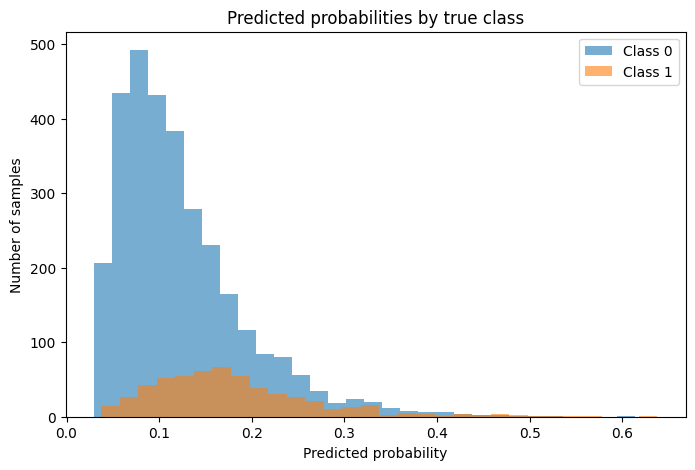

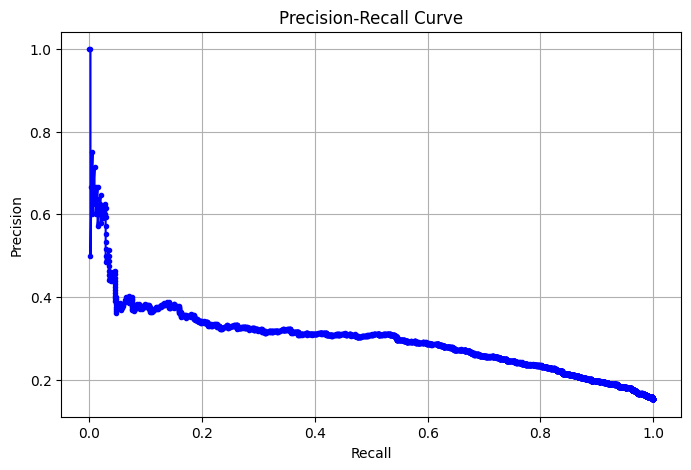

Best F1 threshold: 0.163, F1 = 0.393


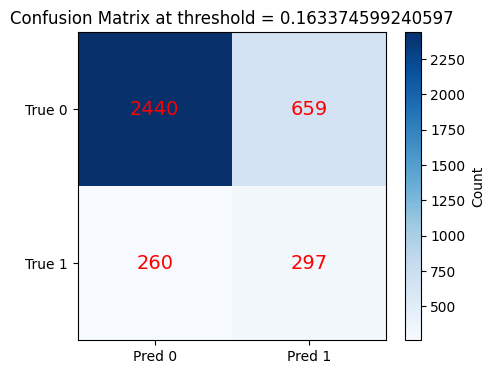

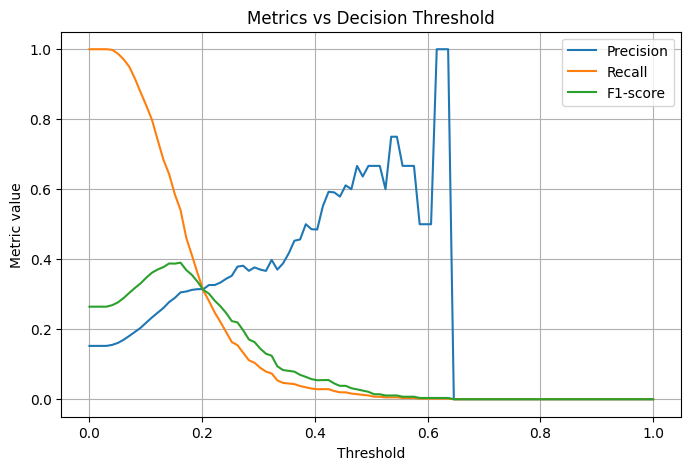

In [ ]:
p = model.predict(X)
# --- 1. Histogram of predicted probabilities by class ---
plt.figure(figsize=(8,5))
plt.hist(p[y==0], bins=30, alpha=0.6, label='Class 0')
plt.hist(p[y==1], bins=30, alpha=0.6, label='Class 1')
plt.xlabel('Predicted probability')
plt.ylabel('Number of samples')
plt.title('Predicted probabilities by true class')
plt.legend()
plt.show()
# --- 2. Precision-Recall curve ---
precision, recall, thresholds = precision_recall_curve(y, p)
plt.figure(figsize=(8,5))
plt.plot(recall, precision, marker='.', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# --- 3. Confusion matrix at chosen threshold ---
threshold = 0.2  # or best_threshold
predicted = (p >= threshold).astype(int)

TP = np.sum((y==1) & (predicted==1))
FP = np.sum((y==0) & (predicted==1))
FN = np.sum((y==1) & (predicted==0))
TN = np.sum((y==0) & (predicted==0))

conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

plt.figure(figsize=(5,4))
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar(label='Count')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i,j], ha='center', va='center', color='r', fontsize=14)
plt.xticks([0,1], ['Pred 0', 'Pred 1'])
plt.yticks([0,1], ['True 0', 'True 1'])
plt.title(f'Confusion Matrix at threshold = {threshold}')
plt.show()

# --- 4. Threshold vs metrics plot ---
thresholds_plot = np.linspace(0,1,100)
precision_list = []
recall_list = []
f1_list = []

for t in thresholds_plot:
    pred_t = (p >= t).astype(int)
    TP_t = np.sum((y==1) & (pred_t==1))
    FP_t = np.sum((y==0) & (pred_t==1))
    FN_t = np.sum((y==1) & (pred_t==0))
    precision_val = TP_t / (TP_t + FP_t + 1e-15)
    recall_val = TP_t / (TP_t + FN_t + 1e-15)
    f1_val = 2 * (precision_val * recall_val) / (precision_val + recall_val + 1e-15)
    
    precision_list.append(precision_val)
    recall_list.append(recall_val)
    f1_list.append(f1_val)

plt.figure(figsize=(8,5))
plt.plot(thresholds_plot, precision_list, label='Precision')
plt.plot(thresholds_plot, recall_list, label='Recall')
plt.plot(thresholds_plot, f1_list, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Metric value')
plt.title('Metrics vs Decision Threshold')
plt.legend()
plt.grid(True)
plt.show()